<a href="https://colab.research.google.com/github/Alexndrs/Bayesian-Network-exploration/blob/main/INF8225_TP1_H25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INF8225 TP1 H25 (v2.0)

**Alexandre - Dréan / 2408681** ########

Partie 3 réalisée: **seul**

Date limite :

20h30 le 6 février 2025 (Partie 1 et 2)

20h30 le 20 février 2025 (Partie 3)

Remettez votre fichier Colab sur Moodle en 2 formats: **.pdf** ET **.ipynb**

```
Je recommande très vivement de consulter le rapport Pdf de la partie 3 joint avec ce rapport.

Le rapport pdf contient la démonstration des caclules ainsi que les analyses des résultats et des explications supplémentaires
```


```
/!\ Je conserve le début de la partie 2 uniquement pour le chargement du dataset et le logger /!\
```

# Partie 2 (20 points)

## Objectif

L’objectif de la partie 2 du travail pratique est de permettre à l’étudiant de se familiariser avec l’apprentissage automatique via la régression logistique. Nous allons donc résoudre un problème de classification d'images en utilisant l’approche de descente du gradient (gradient descent) pour optimiser la log-vraisemblance négative (negative log-likelihood) comme fonction de perte.

L'algorithme à implémenter est une variation de descente de gradient qui s’appelle l’algorithme de descente de gradient stochastique par mini-ensemble (mini-batch stochastic gradient descent).  Votre objectif est d’écrire un programme en Python pour optimiser les paramètres d’un modèle étant donné un ensemble de données d’apprentissage, en utilisant un ensemble de validation pour déterminer quand arrêter l'optimisation, et finalement de montrer la performance sur l’ensemble du test.

## Théorie: la régression logistique et le calcul du gradient


Il est possible d’encoder l’information concernant l’étiquetage avec des vecteurs multinomiaux (one-hot vectors), c.-à-d. un vecteur de zéros avec un seul 1 pour indiquer quand la classe $C=k$ dans la dimension $k$. Par exemple, le vecteur $\mathbf{y}=[0, 1, 0, \cdots, 0]^T$ représente la deuxième classe. Les caractéristiques (features) sont données par des vecteurs $\mathbf{x}_i \in \mathbb{R}^{D}$. En définissant les paramètres de notre modèle comme : $\mathbf{W}=[\mathbf{w}_1, \cdots, \mathbf{w}_K]^T$ et $\mathbf{b}=[b_1, b_2, \cdots  b_K]^T$ et la fonction softmax comme fonction de sortie, on peut exprimer notre modèle sous la forme :
\begin{eqnarray}
    p(\mathbf{y}|\mathbf{x})
    &=& \frac{\exp(\mathbf{y}^T \mathbf{W} \mathbf{x} + \mathbf{y}^T \mathbf{b})}{\sum_{\mathbf{y}_k \in \mathscr{Y}} \exp(\mathbf{y}_k^T \mathbf{W} \mathbf{x} + \mathbf{y}_k^T \mathbf{b})}
\end{eqnarray}
L'ensemble de données consiste de $n$ paires (label, input) de la forme $\mathscr{D}:=(\mathbf{\tilde{y}}_i, \mathbf{\tilde{x}}_i)_{i=1}^n$, où nous utilisons l'astuce de redéfinir $\mathbf{\tilde{x}}_i = [\mathbf{\tilde{x}}_i^T 1]^T$ et nous redéfinissions la matrice de paramètres $\boldsymbol{\theta} \in \mathbb{R}^{K\times(D+1)}$ (voir des notes de cours pour la relation entre $\boldsymbol{\theta}$ et $\mathbf{W}$). Notre fonction de perte, la log-vraisemblance négative des données selon notre modèle est définie comme:
\begin{equation}
    \mathscr{L}\big( \boldsymbol{\theta}, \mathscr{D} \big) := -\log \prod_{i=1}^N P(\mathbf{\tilde{y}}_i|\mathbf{\tilde{x}}_i; \boldsymbol{\theta})
\end{equation}
Pour cette partie du TP, nous avons calculé pour vous le gradient de la fonction de perte par rapport par rapport aux paramètres du modèle:
\begin{eqnarray}
    \frac{\partial}{\partial \boldsymbol{\theta}} \mathscr{L}\big( \boldsymbol{\theta}, \mathscr{D} \big)
    &=& -\sum_{i=1}^N \frac{\partial}{\partial \boldsymbol{\theta}} \Bigg\{\log \Bigg(\frac{\exp(\mathbf{\tilde{y}}_i^T \boldsymbol{\theta} \mathbf{\tilde{x}}_i)}{\sum_{\mathbf{y}_k \in \mathscr{Y}} \exp(\mathbf{y}_k^T \boldsymbol{\theta} \mathbf{\tilde{x}}_i)} \Bigg) \Bigg\} \\
    &=& -\sum_{i=1}^N \left(\mathbf{\tilde{y}}_i \mathbf{\tilde{x}}^T_i- \sum_{\mathbf{y}_k \in \mathscr{Y}} P(\mathbf{y}_k|\mathbf{\tilde{x}}_i,\boldsymbol{\theta}) \mathbf{y}_k \mathbf{\tilde{x}}^T_i \right) \\
    &=& \sum_{i=1}^N \mathbf{\hat{p}}_i \mathbf{\tilde{x}}^T_i - \sum_{i=1}^N \mathbf{\tilde{y}}_i \mathbf{\tilde{x}}^T_i
\end{eqnarray}
où $\mathbf{\hat{p}}_i$ est un vecteur de probabilités produit par le modèle pour l'exemple $\mathbf{\tilde{x}}_i$ et $\mathbf{\tilde{y}}_i$ est le vrai *label* pour ce même exemple.

Finalement, il reste à discuter de l'évaluation du modèle. Pour la tâche d'intérêt, qui est une instance du problème de classification, il existe plusieurs métriques pour mesurer les performances du modèle la précision de classification, l'erreur de classification, le taux de faux/vrai positifs/négatifs, etc. Habituellement dans le contexte de l'apprentissage automatique, la précision est la plus commune.

La précision est définie comme le rapport du nombre d'échantillons bien classés sur le nombre total d'échantillons à classer:
$$
\tau_{acc} := \frac{|\mathscr{C}|}{|\mathscr{D}|}
$$
où l'ensemble des échantillons bien classés $\mathscr{C}$ est:
$$
\mathscr{C} := \lbrace (\mathbf{x}, \mathbf{y}) \in \mathscr{D} \, | \, \underset{k}{\arg\max} \, \, P(\cdot|\mathbf{\tilde{x}}_i; \boldsymbol{\theta})_k = \underset{k}{\arg\max} \, \, \tilde{y}_{i,k} \rbrace
$$
En mots, il s'agit du sous-ensemble d'échantillons pour lesquels la classe la plus probable selon notre modèle correspond à la vraie classe.

## Description des tâches

#### 1. Code à compléter

On vous demande de compléter l'extrait de code ci-dessous pour résoudre ce problème. Vous devez utiliser la librairie PyTorch cette partie du TP: https://pytorch.org/docs/stable/index.html. Mettez à jour les paramètres de votre modèle avec la descente par *mini-batch*. Exécutez des expériences avec trois différents ensembles: un ensemble d’apprentissages avec 90\% des exemples (choisis au hasard), un ensemble de validation avec 10\%. Utilisez uniquement l'ensemble de test pour obtenir votre meilleur résultat une fois que vous pensez avoir obtenu votre meilleure stratégie pour entraîner le modèle.

#### 2. Rapport à rédiger

Présentez vos résultats dans un rapport. Ce rapport devrait inclure:

- **Recherche d'hyperparamètres:** Faites une recherche d'hyperparamètres pour différents taux d'apprentissage, e.g. 0.1, 0.01, 0.001, et différentes tailles de mini-batch, e.g. 1, 20, 200, 1000 pour des modèles entrainés avec SGD. Présentez dans un tableau la précision finale du modèle, sur l'*ensemble de validation*, pour ces différentes combinaisons d'hyperparamètres.

- **Analyse du meilleur modèle:** Pour votre meilleur modèle, présentez deux figures montrant la progression de son apprentissage sur l'*ensembe d'entrainement et l'ensemble de validation*. La première figure montrant les courbes de log-vraisemblance négative moyenne après chaque epoch, la deuxième montrant la précision du modèle après chaque epoch. Finalement donnez la précision finale sur l'ensemble de test.

- **Lire l'article de recherche -
Adam**: a method for stochastic optimization. Kingma, D., \& Ba, J. (2015). International Conference on Learning Representation (ICLR).
https://arxiv.org/pdf/1412.6980.pdf. Implémentez Adam, répétez les deux étapes précédentes (recherche d'hyperparamètres et analyse du meilleur modèle) cette fois en utilisat Adam, et comparez les performances finales avec votre meilleur modèle SGD.

**IMPORTANT**

L'objectif du TP est de vous faire implémenter la rétropropagation à la main. **Il est donc interdit d'utiliser les capacités de construction de modèles ou de différentiation automatique de pytorch -- par exemple, aucun appels à torch.nn, torch.autograd ou à la méthode .backward().** L'objectif est d'implémenter un modèle de classification logistique ainsi que son entainement en utilisant uniquement des opérations matricielles de base fournies par PyTorch e.g. torch.sum(), torch.matmul(), etc.

## Fonctions fournies

In [1]:
# fonctions pour charger les ensembles de donnees
from torchvision.datasets import FashionMNIST
from torchvision import transforms
import torch
import numpy as np
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm
import matplotlib.pyplot as plt

def get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=1):
  dataset = FashionMNIST("./dataset", train=True,  download=True, transform=transforms.Compose([transforms.ToTensor()]))
  dataset_test = FashionMNIST("./dataset", train=False,  download=True, transform=transforms.Compose([transforms.ToTensor()]))
  len_train = int(len(dataset) * (1.-val_percentage))
  len_val = len(dataset) - len_train
  dataset_train, dataset_val = random_split(dataset, [len_train, len_val])
  data_loader_train = DataLoader(dataset_train, batch_size=batch_size,shuffle=True,num_workers=4)
  data_loader_val   = DataLoader(dataset_val, batch_size=batch_size,shuffle=True,num_workers=4)
  data_loader_test  = DataLoader(dataset_test, batch_size=batch_size,shuffle=True,num_workers=4)
  return data_loader_train, data_loader_val, data_loader_test

def reshape_input(x, y):
    x = x.view(-1, 784)
    y = torch.FloatTensor(len(y), 10).zero_().scatter_(1,y.view(-1,1),1)
    return x, y


# call this once first to download the datasets
_ = get_fashion_mnist_dataloaders()

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.3MB/s]


Extracting ./dataset/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./dataset/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 165kB/s]


Extracting ./dataset/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./dataset/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.15MB/s]


Extracting ./dataset/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./dataset/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 3.61MB/s]

Extracting ./dataset/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./dataset/FashionMNIST/raw




/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [2]:
# simple logger to track progress during training
class Logger:
    def __init__(self):
        self.losses_train = []
        self.losses_valid = []
        self.accuracies_train = []
        self.accuracies_valid = []

    def log(self, accuracy_train=0, loss_train=0, accuracy_valid=0, loss_valid=0):
        self.losses_train.append(loss_train)
        self.accuracies_train.append(accuracy_train)
        self.losses_valid.append(loss_valid)
        self.accuracies_valid.append(accuracy_valid)

    def plot_loss_and_accuracy(self, train=True, valid=True):

        assert train and valid, "Cannot plot accuracy because neither train nor valid."

        figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                                            figsize=(12, 6))

        if train:
            ax1.plot(self.losses_train, label="Training")
            ax2.plot(self.accuracies_train, label="Training")
        if valid:
            ax1.plot(self.losses_valid, label="Validation")
            ax1.set_title("CrossEntropy Loss")
            ax2.plot(self.accuracies_valid, label="Validation")
            ax2.set_title("Accuracy")

        for ax in figure.axes:
            ax.set_xlabel("Epoch")
            ax.legend(loc='best')
            ax.set_axisbelow(True)
            ax.minorticks_on()
            ax.grid(True, which="major", linestyle='-')
            ax.grid(True, which="minor", linestyle='--', color='lightgrey', alpha=.4)

    def print_last(self):
        print(f"Epoch {len(self.losses_train):2d}, \
                Train:loss={self.losses_train[-1]:.3f}, accuracy={self.accuracies_train[-1]*100:.1f}%, \
                Valid: loss={self.losses_valid[-1]:.3f}, accuracy={self.losses_valid[-1]*100:.1f}%", flush=True)

## Aperçu de l'ensemble de données FashionMnist

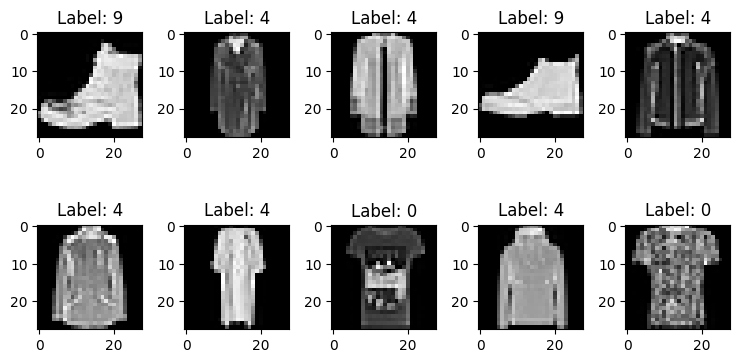

In [ ]:
def plot_samples():
  a, _, _ = get_fashion_mnist_dataloaders()
  num_row = 2
  num_col = 5# plot images
  num_images = num_row * num_col
  fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
  for i, (x,y) in enumerate(a):
      if i >= num_images:
        break
      ax = axes[i//num_col, i%num_col]
      x = (x.numpy().squeeze() * 255).astype(int)
      y = y.numpy()[0]
      ax.imshow(x, cmap='gray')
      ax.set_title(f"Label: {y}")

  plt.tight_layout()
  plt.show()
plot_samples()

# Partie 3 (20 points)

Pour cette partie, vous pouvez travailler en groupes de 2, mais il faut écrire sa propre dérivation et soumettre son propre rapport. Si vous travaillez avec un partenaire, il faut indiquer leur nom dans votre rapport.

### Problème

![picture](https://drive.google.com/uc?id=17_N7pIrf5pypQKiUh5cM7SX6raZUBcJC)

Considérons maintenant un réseau de neurones avec une couche d'entrée avec $D=784$ unités, $L$ couches cachées, chacune avec 300 unités et un vecteur de sortie $\mathbf{y}$ de dimension $K$. Vous avez $i = 1, .., N$ exemples dans un ensemble d'apprentissage, où chaque ${\bf x}_i \in \mathbb{R}^{784}$ est un vecteur de caractéristiques (features). $\mathbf{y}$ est un vecteur du type *one-hot* -- un vecteur de zéros avec un seul 1 pour indiquer que la classe $C=k$ dans la dimension $k$. Par exemple, le vecteur $\mathbf{y}=[0, 1, 0, \cdots, 0]^T$ représente la deuxième classe. La fonction de perte est donnée par
\begin{equation}
\mathscr{L} = -\sum_{i=1}^{N}\sum_{k=1}^{K}y_{k,i}\log (f_k( {\bf x}_i )  )
\end{equation}

La fonction d'activation de la couche finale a la forme  ${\bf f} = [f_1, ..., f_K]$ donné par la fonction d'activation softmax:
\begin{equation}
f_k( {\bf a}^{(L+1)}({\bf x}_i) ) = \frac{\exp(a_k^{(L+1)})}{\sum_{c=1}^{K}\exp(a_c^{(L+1)})}, \;\;\;\;
\nonumber
\end{equation}

et les couches cachées utilisent une fonction d'activation de type ReLU:
\begin{equation}
  {\bf h}^{(l)}({\bf a}^{(l)}({\bf x}_i)) = \text{ReLU}({\bf a}^{(l)}({\bf x}_i) = \max\Big(0, \, \, {\bf a}^{(l)}({\bf x}_i)\Big)
\end{equation}

où ${\bf a}^{(l)}$ est le vecteur résultant du calcul de la préactivation habituelle ${\bf a}^{(l)}={\bf W}^{(l)}{\bf h}^{(l-1)} + {\bf b}^{(l)}$, qui pourrait être simplifiée à ${\boldsymbol \theta}^{(l)}\tilde{\bf h}^{(l-1)}$ en utilisant l'astuce de définir $\tilde{\bf h}$ comme ${\bf h}$ avec un 1 concaténé à la fin du vecteur.



### Questions

* a) (10 points) Donnez le pseudocode incluant des *calculs matriciels—vectoriels* détaillés pour l'algorithme de rétropropagation pour calculer le gradient pour les paramètres de chaque couche **étant donné un exemple d'entraînement**.

* b) (15 points)
Implémentez l'optimisation basée sur le gradient de ce réseau en Pytorch.
Utilisez le code squelette ci-dessous comme point de départ et implémentez les mathématiques de l'algorithme de rétropropagation que vous avez décrit à la question précédente. Comparez vos gradients et votre optimisation avec le même modèle optimisé avec Autograd. Lequel est le plus rapide ? Proposez quelques expériences. Utilisez encore l'ensemble de données de Fashion MNIST (voir Partie 2). **Comparez différents modèles ayant différentes largeurs (nombre d'unités) et profondeurs (nombre de couches)**. Ici encore, n'utilisez l'ensemble de test que pour votre expérience finale lorsque vous pensez avoir obtenu votre meilleur modèle.


**IMPORTANT**

L'objectif du TP est de vous faire implémenter la rétropropagation à la main. L'objectif est d'implémenter un modèle de classification logistique ainsi que son entainement en utilisant uniquement des opérations matricielles de base fournies par PyTorch e.g. torch.sum(), torch.matmul(), etc. **Une fois que vous avez implémenté votre modèle, vous devez le comparer avec un modèle construit en utilisant les capacités de pytorch qui permettent une différenciation automatique. Autrement dit, pour la deuxième implémentation, vous pouvez utilisertorch.nn, torch.autograd ou à la méthode .backward().** Vous pouvez utiliser l’implémentation de votre choix pour explorer différentes architectures de modèles.

## Votre pseudocode:

```
Le pseudo code plus propre est présent dans le rapport pdf
```

#### Algorithme de rétropopagation dans un réseau de neurones pour un exemple $\tilde{x}_i$ :


#### Les calules justifiant cet algorithme on été effectués dans le rapport joint.

$x_i$ est noté simplement $x$ dans l'algo

***Require***

>$L$ (nombre de couches cachées),

>$x$ (exemple de donnée d'entrainement),

>$\theta^{(l)}$ (poids des couches),

> $\tilde{h}^{(l)}$ (post-activation augmentée : issue de la forward prop de x à la couche $l$),

> $a^{(l)}$ (pré-activation : issue de la forward prop de x à la couche $l$), $\text{lr}$ (learning rate)

**Initialisation *texte en italique* :**

> $\Delta^{(L+1)} \gets y - y_{\text{pred}}$

> $\text{grad}^{(L+1)} \gets -\Delta^{(L+1)} \cdot (\tilde{h}^{(L)})^T$

 ***For*** $l = L$ ***to*** $1$ :

> $d^{(l)} \gets \text{relu_backward}(a^{(l)})$

>$W^{(l+1)} \gets \theta^{(l+1)}$ sans la dernière ligne

>$\Delta^{(l)} \gets d^{(l)} \circ (W^{(l+1)T} \cdot \Delta^{(l+1)})$

>$\text{grad}^{(l)} \gets -\Delta^{(l)} \cdot (\tilde{h}^{(l-1)})^T$

  **EndFor**

  ***For*** $l = L+1$ ***to*** $1$ :
  >$\theta^{(l)} \gets \theta^{(l)} - \text{lr} \cdot \text{grad}^{(l)}$
  
  **EndFor**

## Fonctions à compléter

In [3]:
''' Les fonctions dans cette cellule peuvent avoir les mêmes déclarations que celles de la partie 2'''
def accuracy(y, y_pred) :
    # todo : nombre d'éléments à classifier.
    card_D = len(y)

    # todo : calcul du nombre d'éléments bien classifiés.
    y_pred_classes = torch.argmax(y_pred, dim=1)  # Indices des classes prédictes
    y_true_classes = torch.argmax(y, dim=1)       # Indices des classes vraies
    card_C = (y_pred_classes == y_true_classes).sum().item()

    # todo : calcul de la précision de classification.
    acc = card_C / card_D

    return acc, (card_C, card_D)

def accuracy_and_loss_whole_dataset(data_loader, model):
    cardinal = 0
    loss     = 0.
    n_accurate_preds  = 0.

    for x, y in data_loader:
        x, y = reshape_input(x, y)
        y_pred                = model.forward(x)
        xentrp                = cross_entropy(y, y_pred)
        _, (n_acc, n_samples) = accuracy(y, y_pred)

        cardinal = cardinal + n_samples
        loss     = loss + xentrp
        n_accurate_preds  = n_accurate_preds + n_acc

    loss = loss / float(cardinal)
    acc  = n_accurate_preds / float(cardinal)

    return acc, loss

def inputs_tilde(x, axis=-1):
    # augments the inputs `x` with ones along `axis`
    # todo : implémenter code ici.
    # On concatène une colonne de 1 pour le biais
    ones = torch.ones(x.shape[0], 1)
    x_tilde = torch.cat((x, ones), dim=axis)
    return x_tilde

def softmax(x, axis=-1):
    # assurez vous que la fonction est numeriquement stable
    # e.g. softmax(np.array([1000, 10000, 100000], ndim=2))
    # todo : calcul des valeurs de softmax(x)

    #On assume que les d'entrées sont les suivantes :

    # x = [x_1, x_2 ... x_batchSize]
    # x_1 = [w_observ1_classe0 . x_observ1_classe0 + b_observ1_classe0, w_observ1_classe1 . x_observ1_classe1 + b_observ1_classe1, ...]  (logit pour les différentes classes)

    # Pour la stabilité comme softmax(x_i) = [exp(x_i[0]), exp(x_i[1]), ... , exp(x_i[K])] / sum(exp(x_i))
    # si on divise en haut et en base bar exp(max(x_i)) on toujours l'égalité donc on peut juste retranché le logit le plus grand pour chaque batch afin d'avoir aucun exponentiel > 1 (non stable) à caculer

    x_max = torch.amax(x, dim=axis, keepdim=True)
    x_exp = torch.exp(x - x_max)
    sum_exp = torch.sum(x_exp, dim=axis, keepdim=True)
    values = x_exp / sum_exp
    return values

def cross_entropy(y, y_pred):
    # todo : calcul de la valeur d'entropie croisée.
    loss = -torch.sum(y * torch.log(y_pred + 1e-8)) / y.shape[0]
    return loss

def softmax_cross_entropy_backward(y, y_pred):
     # todo : calcul de la valeur du gradient de l'entropie croisée composée avec `softmax`
     # On a L = -\sum_k y_k log(softmax_k) et on a montré que ce gradiant par rapport aux pré-activation (les a^(L+1) avant le softmax) donne
     # dL/da^(L+1) = -\Delta^(L+1) = -(y-y_pred)
     values = -(y-y_pred)
     return values

def relu_forward(x):
    # todo : calcul des valeurs de relu(x)
    # Relu c'est juste le max valeurs par valeurs entre 0 et les valeurs de x, on évite d'utiliser torch.relu pour essayer de tout faire le plus possible à la main pour bien comprendre
    values = torch.maximum(x, torch.tensor(0.0))
    return values

def relu_backward(x):
    # todo : calcul des valeurs du gradient de la fonction `relu`
    values = (x > 0).float()  # 1 si x > 0, sinon 0
    return values


# Model est une classe representant votre reseaux de neuronnes
class MLPModel:
    def __init__(self, n_features, n_hidden_features, n_hidden_layers, n_classes):
        self.n_features        = n_features
        self.n_hidden_features = n_hidden_features
        self.n_hidden_layers   = n_hidden_layers
        self.n_classes         = n_classes

        # todo : initialiser la liste des paramètres Teta de l'estimateur.


        self.params = []

        # première couche theta^(1) : (n_hidden_features, n_features+1)
        self.params.append(torch.randn(n_hidden_features, n_features+1) * torch.sqrt(torch.tensor(2.0/(n_features+1))))

        # Couches cachées theta^(l) : (n_hidden_features, n_hidden_features + 1)
        for _ in range(n_hidden_layers - 1):
            self.params.append(torch.randn(n_hidden_features, n_hidden_features + 1) * torch.sqrt(torch.tensor(2.0/(n_hidden_features+1))))

        # dernière couche theta^(L+1) : (n_classes, n_hidden_features + 1)
        self.params.append(torch.randn(n_classes, n_hidden_features + 1) * torch.sqrt(torch.tensor(2.0/(n_hidden_features+1))))



        print(f"Teta params={[p.shape for p in self.params]}")

        self.a = None # liste contenant le resultat des multiplications matricielles
        self.h = None # liste contenant le resultat des fonctions d'activations

        self.t = 0
        self.m_t = [] # pour Adam: moyennes mobiles du gradient
        self.v_t = [] # pour Adam: moyennes mobiles du carré du gradient

    def forward(self, x):

      self.a = []
      self.h = []
      h = inputs_tilde(x, 1)
      h = torch.transpose(h, 0, 1)
      self.h.append(h)
      l = 0
      for theta in self.params[:-1]:
        l+= 1
        a = torch.matmul(theta, h)
        self.a.append(a)
        h = relu_forward(a)
        h = torch.transpose(h, 0, 1)
        h = inputs_tilde(h, 1)
        h = torch.transpose(h, 0, 1)

        self.h.append(h)
      a = torch.matmul(self.params[-1], h)
      self.a.append(a)
      outputs = softmax(torch.transpose(a,0,1), 1)

      return outputs

    def backward(self, y, y_pred):
      # todo : implémenter calcul des gradients.

      #On fait les calcules comme si on avait un batch de taille 1 et donc des vecteurs colonnes pour les couches
      y_pred = torch.transpose(y_pred,0,1)
      y = torch.transpose(y,0,1)


      delta = - softmax_cross_entropy_backward(y, y_pred)
      deltas = [delta]
      grads = []
      for i in range(len(self.params)):
        l = len(self.params)-1 - i
        if l != len(self.params)-1:
          # calculer delta^(l) en fonction du suivant delta^(l+1)
          dl = relu_backward(self.a[l]) #vecteur issue de la matrice D^(l) issue de dh^(l)/da^(l)
          W_next = self.params[l+1][:,:-1]
          mult = torch.matmul(torch.transpose(W_next, 0,1), delta)
          delta = dl * mult
          deltas.append(delta)

        grad = -torch.matmul(delta, torch.transpose(self.h[l],0,1))   #pas besoin de mettre h[l-1] car les h sont indicé en décalé par rapport au W et a car on a mis l'input tilde dans h au début et pas l'output
        # print(f"grad.shape : {grad.shape}", "\n")
        grads.append(grad)

      list.reverse(grads)
      return grads

    def sgd_update(self, lr, grads):
      # TODO : implémenter mise à jour des paramètres ici.

      for i in range(len(self.params)):
        self.params[i] -= lr * grads[i]


    def adam_update(self, lr, grads):
      # TODO : implémenter mise à jour des paramètres ici.
      beta1 = 0.9
      beta2 = 0.999

      if not self.m_t:
        self.m_t = [torch.zeros_like(g) for g in grads]
        self.v_t = [torch.zeros_like(g) for g in grads]


      self.t += 1
      for i in range(len(self.params)):
        self.m_t[i] = beta1 * self.m_t[i] + (1 - beta1) * grads[i]
        self.v_t[i] = beta2 * self.v_t[i] + (1 - beta2) * (grads[i]**2)
        m = self.m_t[i] / (1 - beta1**self.t)
        v = self.v_t[i] / (1 - beta2**self.t)
        self.params[i] -= lr * m / (torch.sqrt(v) + 1e-8)

def train(model, lr=0.1, nb_epochs=10, sgd=True, data_loader_train=None, data_loader_val=None):
    best_model = None
    best_val_accuracy = 0
    logger = Logger()

    for epoch in range(nb_epochs+1):

        # at epoch 0 evaluate random initial model
        #   then for subsequent epochs, do optimize before evaluation.
        if epoch > 0:
            for x, y in data_loader_train:
                x, y = reshape_input(x, y)

                y_pred = model.forward(x)
                grads  = model.backward(y, y_pred)
                if sgd:
                  model.sgd_update(lr, grads)
                else:
                  model.adam_update(lr, grads)

        accuracy_train, loss_train = accuracy_and_loss_whole_dataset(data_loader_train, model)
        accuracy_val, loss_val = accuracy_and_loss_whole_dataset(data_loader_val, model)

        if accuracy_val > best_val_accuracy:
          best_val_accuracy = accuracy_val
          best_model = model

        logger.log(accuracy_train, loss_train, accuracy_val, loss_val)
        print(f"Epoch {epoch:2d}, \
                Train:loss={loss_train:.3f}, accuracy={accuracy_train*100:.1f}%, \
                Valid: loss={loss_val:.3f}, accuracy={accuracy_val*100:.1f}%", flush=True)

    return best_model, best_val_accuracy, logger

## Évaluation

### SGD: Recherche d'hyperparamètres

In [ ]:
# SGD
# Montrez les résultats pour différents nombre de couche, e.g. 1, 3, 5, et différent nombres de neurone, e.g. 25, 100, 300, 500, 1000.
depth_list = [1,3,5]   # Define ranges in a list
width_list = [25, 100, 300, 500, 1000]   # Define ranges in a list
lr = 0.001           # Some value
batch_size = 50   # Some value

with torch.no_grad():
  for depth in depth_list:
    for width in width_list:
      print("------------------------------------------------------------------")
      print("Training model with a depth of {0} layers and a width of {1} units".format(depth, width))
      data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

      MLP_model = MLPModel(n_features=784, n_hidden_features=width, n_hidden_layers=depth, n_classes=10)
      _, val_accuracy, _ = train(MLP_model,lr=lr, nb_epochs=5, sgd=True, data_loader_train=data_loader_train, data_loader_val=data_loader_val)
      print(f"validation accuracy = {val_accuracy*100:.3f}")

------------------------------------------------------------------
Training model with a depth of 1 layers and a width of 25 units
Teta params=[torch.Size([25, 785]), torch.Size([10, 26])]
Epoch  0,                 Train:loss=0.052, accuracy=9.3%,                 Valid: loss=0.052, accuracy=9.6%
Epoch  1,                 Train:loss=0.010, accuracy=82.6%,                 Valid: loss=0.010, accuracy=81.3%
Epoch  2,                 Train:loss=0.009, accuracy=84.7%,                 Valid: loss=0.009, accuracy=83.7%
Epoch  3,                 Train:loss=0.008, accuracy=85.6%,                 Valid: loss=0.009, accuracy=84.9%
Epoch  4,                 Train:loss=0.008, accuracy=86.1%,                 Valid: loss=0.008, accuracy=85.0%
Epoch  5,                 Train:loss=0.008, accuracy=86.8%,                 Valid: loss=0.008, accuracy=85.6%
validation accuracy = 85.567
------------------------------------------------------------------
Training model with a depth of 1 layers and a width of 10

#### **Tableau pour la précision sur l'ensemble de validation**
N.B. que les lignes correspondent aux nombre de couche et les colonnes correspondent au nombre de neurone dans chaque couche. Les valeurs ci-dessous sont donné comme exemples; remplacez-les par les valeurs que vous avez utilisées pour votre recherche d'hyperparamètres.

depth\width  | 25 | 100 | 300 | 500 | 1000
-------------------|------------------|------------------|------------------|------------------|------------------|
**1**   | 85.567  |86.267 | 87.150 | 87.500 | 88.100 |
**3** | 86.617  | 86.667 | 88.417 | 88.333 | 88.583 |
**5**  | 84.750  | 87.300 | 87.767 | 89.200 | 89.417 |

### SGD: Analyse du meilleur modèle

Teta params=[torch.Size([1000, 785]), torch.Size([1000, 1001]), torch.Size([1000, 1001]), torch.Size([1000, 1001]), torch.Size([1000, 1001]), torch.Size([10, 1001])]
Epoch  0,                 Train:loss=0.051, accuracy=9.8%,                 Valid: loss=0.051, accuracy=9.2%
Epoch  1,                 Train:loss=0.008, accuracy=85.7%,                 Valid: loss=0.008, accuracy=84.7%
Epoch  2,                 Train:loss=0.006, accuracy=88.5%,                 Valid: loss=0.007, accuracy=87.3%
Epoch  3,                 Train:loss=0.006, accuracy=90.1%,                 Valid: loss=0.006, accuracy=88.3%
Epoch  4,                 Train:loss=0.005, accuracy=90.2%,                 Valid: loss=0.006, accuracy=88.1%
Epoch  5,                 Train:loss=0.005, accuracy=90.1%,                 Valid: loss=0.007, accuracy=87.4%
Best validation accuracy = 88.317
Evaluation of the best training model over test set
------
Loss : 0.007
Accuracy : 86.040


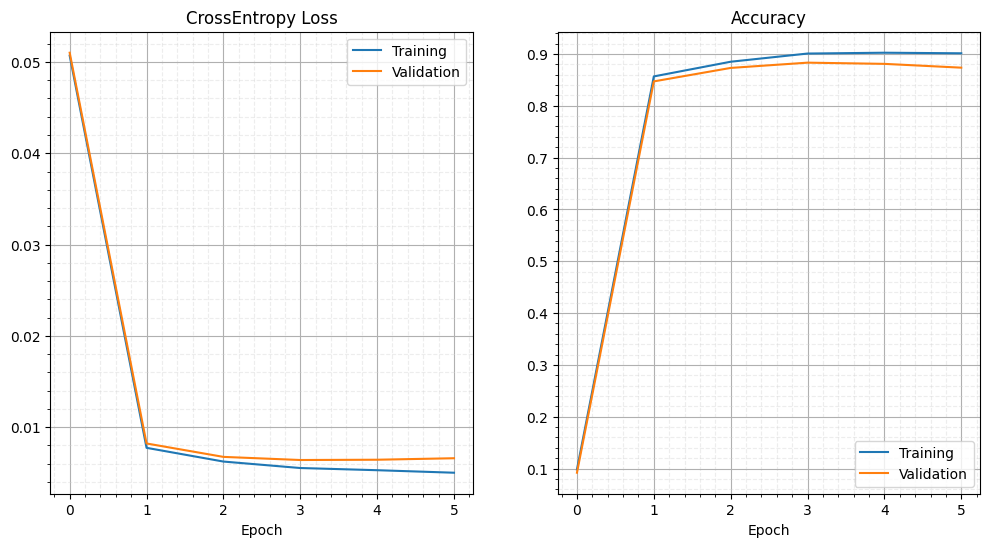

In [ ]:
# SGD
# Montrez les résultats pour la meilleure configuration trouvez ci-dessus.
depth = 5    # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
width = 1000    # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
lr = 0.001           # Some value
batch_size = 50   # Some value

with torch.no_grad():
  data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

  MLP_model = MLPModel(n_features=784, n_hidden_features=width, n_hidden_layers=depth, n_classes=10)
  best_model, best_val_accuracy, logger = train(MLP_model,lr=lr, nb_epochs=5, sgd=True,
                                                data_loader_train=data_loader_train, data_loader_val=data_loader_val)
  logger.plot_loss_and_accuracy()
  print(f"Best validation accuracy = {best_val_accuracy*100:.3f}")

  accuracy_test, loss_test = accuracy_and_loss_whole_dataset(data_loader_test, best_model)
print("Evaluation of the best training model over test set")
print("------")
print(f"Loss : {loss_test:.3f}")
print(f"Accuracy : {accuracy_test*100.:.3f}")

### Adam: Recherche d'hyperparamètres

Implémentez Adam, répétez les deux étapes précédentes (recherche d'hyperparamètres et analyse du meilleur modèle) cette fois en utilisat Adam, et comparez les performances finales avec votre meilleur modèle SGD.

In [11]:
# ADAM
# Montrez les résultats pour différents nombre de couche, e.g. 1, 3, 5, et différent nombres de neurone, e.g. 25, 100, 300, 500, 1000.
depth_list = [1,3,5]   # Define ranges in a list
width_list = [25, 100, 300, 500, 1000]   # Define ranges in a list
lr = 0.001           # Some value
batch_size = 500   # Some value

with torch.no_grad():
  for depth in depth_list:
    for width in width_list:
      print("------------------------------------------------------------------")
      print("Training model with a depth of {0} layers and a width of {1} units".format(depth, width))
      data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

      MLP_model = MLPModel(n_features=784, n_hidden_features=width, n_hidden_layers=depth, n_classes=10)
      _, val_accuracy, _ = train(MLP_model, lr=lr, nb_epochs=5, sgd=False, data_loader_train=data_loader_train, data_loader_val=data_loader_val)
      print(f"validation accuracy = {val_accuracy*100:.3f}")

------------------------------------------------------------------
Training model with a depth of 1 layers and a width of 25 units
Teta params=[torch.Size([25, 785]), torch.Size([10, 26])]
Epoch  0,                 Train:loss=0.005, accuracy=12.2%,                 Valid: loss=0.005, accuracy=12.3%
Epoch  1,                 Train:loss=0.001, accuracy=79.6%,                 Valid: loss=0.001, accuracy=79.0%
Epoch  2,                 Train:loss=0.001, accuracy=82.1%,                 Valid: loss=0.001, accuracy=81.4%
Epoch  3,                 Train:loss=0.001, accuracy=83.9%,                 Valid: loss=0.001, accuracy=83.4%
Epoch  4,                 Train:loss=0.001, accuracy=84.6%,                 Valid: loss=0.001, accuracy=83.9%
Epoch  5,                 Train:loss=0.001, accuracy=85.2%,                 Valid: loss=0.001, accuracy=84.7%
validation accuracy = 84.700
------------------------------------------------------------------
Training model with a depth of 1 layers and a width of 

#### **Tableau pour la précision sur l'ensemble de validation**
N.B. que les lignes correspondent aux nombre de couche et les colonnes correspondent au nombre de neurone dans chaque couche. Les valeurs ci-dessous sont donné comme exemples; remplacez-les par les valeurs que vous avez utilisées pour votre recherche d'hyperparamètres.

depth\width  | 25    | 100   | 300   | 500   | 1000  
-------------------|-------|-------|-------|-------|-------
**1**  | 84.700 | 86.100 | 86.717 | 88.550 | 88.083
**3**  | 85.600 | 87.783 | 88.267 | **89.133** | 88.950
**5**  | 85.417 | 87.833 | 87.500 | 87.517 | 87.900


### Adam: Analyse du meilleur modèle

Teta params=[torch.Size([500, 785]), torch.Size([500, 501]), torch.Size([500, 501]), torch.Size([10, 501])]
Epoch  0,                 Train:loss=0.005, accuracy=9.7%,                 Valid: loss=0.005, accuracy=10.6%
Epoch  1,                 Train:loss=0.001, accuracy=85.9%,                 Valid: loss=0.001, accuracy=86.1%
Epoch  2,                 Train:loss=0.001, accuracy=87.7%,                 Valid: loss=0.001, accuracy=87.5%
Epoch  3,                 Train:loss=0.001, accuracy=89.8%,                 Valid: loss=0.001, accuracy=89.1%
Epoch  4,                 Train:loss=0.001, accuracy=90.5%,                 Valid: loss=0.001, accuracy=89.1%
Epoch  5,                 Train:loss=0.001, accuracy=90.7%,                 Valid: loss=0.001, accuracy=88.7%
Best validation accuracy = 89.117
Evaluation of the best training model over test set
------
Loss : 0.001
Accuracy : 87.280


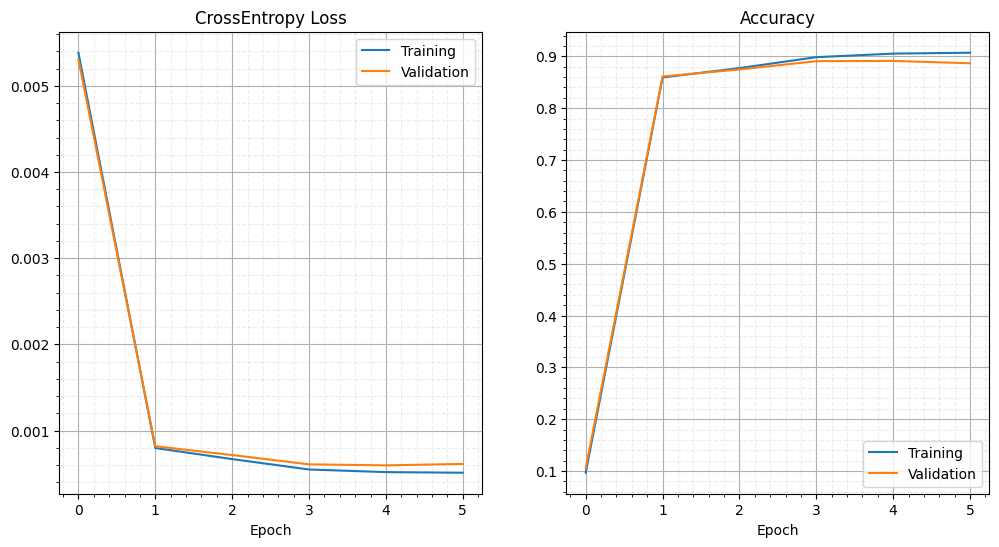

In [15]:
# ADAM
# Montrez les résultats pour la meilleure configuration trouvez ci-dessus.
depth = 3    # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
width = 500    # TODO: Vous devez modifier cette valeur avec la meilleur que vous avez eu.
lr = 0.001           # Some value
batch_size = 500   # Some value

with torch.no_grad():
  data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

  MLP_model = MLPModel(n_features=784, n_hidden_features=width, n_hidden_layers=depth, n_classes=10)
  best_model, best_val_accuracy, logger = train(MLP_model,lr=lr, nb_epochs=5, sgd=False,
                                                data_loader_train=data_loader_train, data_loader_val=data_loader_val)
  logger.plot_loss_and_accuracy()
  print(f"Best validation accuracy = {best_val_accuracy*100:.3f}")

  accuracy_test, loss_test = accuracy_and_loss_whole_dataset(data_loader_test, best_model)
print("Evaluation of the best training model over test set")
print("------")
print(f"Loss : {loss_test:.3f}")
print(f"Accuracy : {accuracy_test*100.:.3f}")

## Modèle avec autograd pyTorch

In [13]:
import torch.nn as nn
import torch.optim as optim
import copy


def accuracy_and_loss_pytorch(data_loader, model):
    cardinal = 0
    # On utilise la fonction de pyTorch pour la Loss crossEntropy
    loss_fn = nn.CrossEntropyLoss()
    total_loss = 0
    n_accurate_preds = 0

    model.eval()  # Mode évaluation
    with torch.no_grad():
        for x, y in data_loader:
            x, y = reshape_input(x, y)
            y_pred = model.forward(x)
            y_classes = torch.argmax(y, dim=1)

            # Calcul de la perte (CrossEntropy)
            loss = loss_fn(y_pred, y_classes)
            total_loss += loss.item() * x.size(0)

            # Calcul de la précision
            _, (n_acc, n_samples) = accuracy(y, y_pred)
            cardinal += n_samples
            n_accurate_preds += n_acc

    avg_loss = total_loss / cardinal
    acc = n_accurate_preds / cardinal

    return acc, avg_loss


def train_pytorch(model, lr=0.1, nb_epochs=10, data_loader_train=None, data_loader_val=None):
    best_model = None
    best_val_accuracy = 0
    logger = Logger()

    # On choisit Adam comme optimiseur
    optimizer = optim.Adam(model.parameters(), lr=lr)

    loss_fn = nn.CrossEntropyLoss()

    for epoch in range(nb_epochs+1):
        # at epoch 0 evaluate random initial model
        #   then for subsequent epochs, do optimize before evaluation.
        if epoch > 0:
            model.train()  # Mode entraînement
            for x, y in data_loader_train:
                x, y = reshape_input(x, y)

                # Forward prop
                optimizer.zero_grad()
                y_pred = model(x)
                y_classes = torch.argmax(y, dim=1)

                # Calcul de la perte
                loss = loss_fn(y_pred, y_classes)

                # Backward prop
                loss.backward()

                # update
                optimizer.step()

        # Évaluation sur les ensembles d'entraînement et de validation
        model.eval()  # Mode évaluation
        accuracy_train, loss_train = accuracy_and_loss_pytorch(data_loader_train, model)
        accuracy_val, loss_val = accuracy_and_loss_pytorch(data_loader_val, model)

        if accuracy_val > best_val_accuracy:
            best_val_accuracy = accuracy_val
            best_model = copy.deepcopy(model)

        logger.log(accuracy_train, loss_train, accuracy_val, loss_val)
        print(f"Epoch {epoch:2d}, "
              f"Train: loss={loss_train:.3f}, accuracy={accuracy_train*100:.1f}%, "
              f"Valid: loss={loss_val:.3f}, accuracy={accuracy_val*100:.1f}%", flush=True)

    return best_model, best_val_accuracy, logger




class PyTorchNN(nn.Module):
    def __init__(self, n_features, n_hidden_features, n_hidden_layers, n_classes):
        super(PyTorchNN, self).__init__()

        self.layers = nn.ModuleList()


        # Première couche (input -> hidden)
        self.layers.append(nn.Linear(n_features, n_hidden_features))

        # Couches cachées (hidden -> hidden)
        for _ in range(n_hidden_layers - 1):
            self.layers.append(nn.Linear(n_hidden_features, n_hidden_features))

        # Dernière couche (hidden -> output)
        self.layers.append(nn.Linear(n_hidden_features, n_classes))


        self.activation = nn.ReLU()

    def forward(self, x):
        # propagation dans les neurones cachés
        for layer in self.layers[:-1]:
            x = self.activation(layer(x))

        # dernière couche sans softmax car la fonction nn.CrossEntropyLoss attend les logits
        x = self.layers[-1](x)
        return x

In [14]:
depth_list = [1,3,5]   # Define ranges in a list
width_list = [25, 100, 300, 500, 1000]   # Define ranges in a list
lr = 0.001
           # Some value
batch_size = 500   # Some value

for depth in depth_list:
  for width in width_list:
    print("------------------------------------------------------------------")
    print("Training model with a depth of {0} layers and a width of {1} units".format(depth, width))
    data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

    torch_model = PyTorchNN(n_features=784, n_hidden_features=width, n_hidden_layers=depth, n_classes=10)
    _, val_accuracy, _ = train_pytorch(torch_model, lr=lr, nb_epochs=5, data_loader_train=data_loader_train, data_loader_val=data_loader_val)
    print(f"validation accuracy = {val_accuracy*100:.3f}")

------------------------------------------------------------------
Training model with a depth of 1 layers and a width of 25 units
Epoch  0, Train: loss=2.320, accuracy=10.0%, Valid: loss=2.321, accuracy=9.7%
Epoch  1, Train: loss=0.680, accuracy=76.2%, Valid: loss=0.675, accuracy=76.7%
Epoch  2, Train: loss=0.548, accuracy=81.2%, Valid: loss=0.549, accuracy=81.5%
Epoch  3, Train: loss=0.496, accuracy=83.1%, Valid: loss=0.501, accuracy=83.3%
Epoch  4, Train: loss=0.467, accuracy=83.9%, Valid: loss=0.476, accuracy=84.2%
Epoch  5, Train: loss=0.455, accuracy=84.4%, Valid: loss=0.469, accuracy=84.2%
validation accuracy = 84.233
------------------------------------------------------------------
Training model with a depth of 1 layers and a width of 100 units
Epoch  0, Train: loss=2.316, accuracy=9.1%, Valid: loss=2.317, accuracy=9.1%
Epoch  1, Train: loss=0.547, accuracy=81.5%, Valid: loss=0.544, accuracy=81.8%
Epoch  2, Train: loss=0.460, accuracy=84.4%, Valid: loss=0.466, accuracy=84.4%


#### **Tableau pour la précision sur l'ensemble de validation**
N.B. que les lignes correspondent aux nombre de couche et les colonnes correspondent au nombre de neurone dans chaque couche. Les valeurs ci-dessous sont donné comme exemples; remplacez-les par les valeurs que vous avez utilisées pour votre recherche d'hyperparamètres.

| depth\width | 25       | 100      | 300      | 500      | 1000     |
|-------------|----------|----------|----------|----------|----------|
| **1**       | 84.233%  | 85.950%  | 87.350%  | 87.017%  | 87.817%  |
| **3**       | 83.233%  | 85.733%  | 87.133%  | 87.783%  | **88.417%**  |
| **5**       | 79.733%  | 84.350%  | 87.000%  | 88.233%  | 87.617%  |


Epoch  0, Train: loss=2.304, accuracy=10.0%, Valid: loss=2.304, accuracy=10.2%
Epoch  1, Train: loss=0.419, accuracy=84.7%, Valid: loss=0.441, accuracy=84.0%
Epoch  2, Train: loss=0.356, accuracy=86.9%, Valid: loss=0.376, accuracy=86.5%
Epoch  3, Train: loss=0.304, accuracy=88.8%, Valid: loss=0.343, accuracy=86.9%
Epoch  4, Train: loss=0.274, accuracy=90.1%, Valid: loss=0.313, accuracy=88.4%
Epoch  5, Train: loss=0.271, accuracy=90.0%, Valid: loss=0.321, accuracy=87.8%
Best validation accuracy = 88.367
Evaluation of the best training model over test set
------
Loss : nan
Accuracy : 87.850


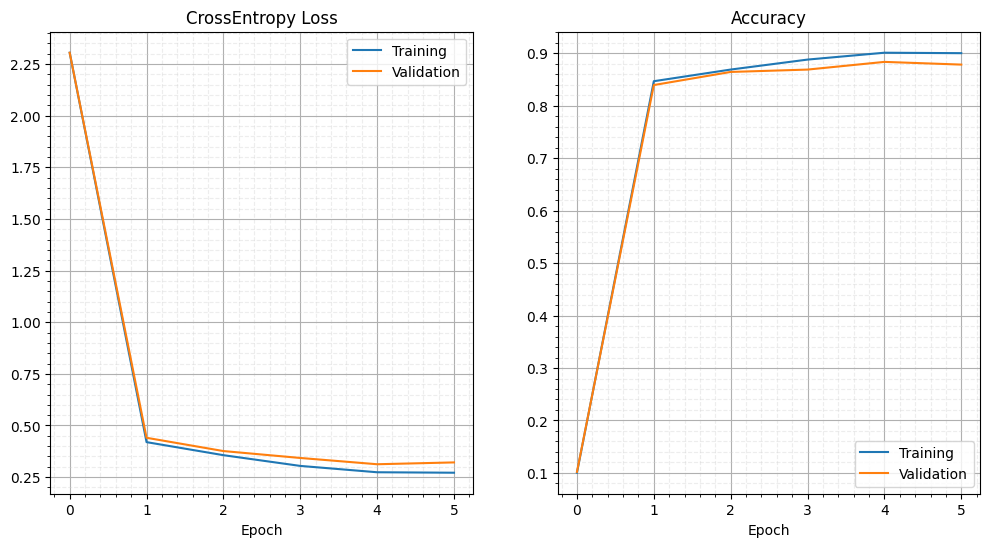

In [16]:
depth = 3
width = 1000
lr = 0.001
batch_size = 500

data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=batch_size)

torch_model = PyTorchNN(n_features=784, n_hidden_features=width, n_hidden_layers=depth, n_classes=10)
best_model, best_val_accuracy, logger = train_pytorch(torch_model,lr=lr, nb_epochs=5,
                                              data_loader_train=data_loader_train, data_loader_val=data_loader_val)
logger.plot_loss_and_accuracy()
print(f"Best validation accuracy = {best_val_accuracy*100:.3f}")

accuracy_test, loss_test = accuracy_and_loss_whole_dataset(data_loader_test, best_model)
print("Evaluation of the best training model over test set")
print("------")
print(f"Loss : {loss_test:.3f}")
print(f"Accuracy : {accuracy_test*100.:.3f}")

### Analyse des Résultats

Répondez içi...